In [2]:
import numpy as np
from google.colab import drive
drive.mount("./gdrive")
drive_root_dir = "./gdrive/My Drive/"

# X = images, Z = labels
X = []
Z = []
imgsize = 227
N = 10

Drive already mounted at ./gdrive; to attempt to forcibly remount, call drive.mount("./gdrive", force_remount=True).


In [0]:
from tqdm import tqdm
import os
import cv2

def label_assignment(img,label):
    return label

#tqdm == progress var
def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        
        X.append(np.array(img))
        Z.append(str(label))

In [4]:
chihuahua_dir = drive_root_dir + 'Images/n02085620-Chihuahua'
japanese_spaniel_dir = drive_root_dir + 'Images/n02085782-Japanese_spaniel'
maltese_dir = drive_root_dir + 'Images/n02085936-Maltese_dog'
pekinese_dir = drive_root_dir + 'Images/n02086079-Pekinese'
shitzu_dir = drive_root_dir + 'Images/n02086240-Shih-Tzu'
blenheim_spaniel_dir = drive_root_dir + 'Images/n02086646-Blenheim_spaniel'
papillon_dir = drive_root_dir + 'Images/n02086910-papillon'
toy_terrier_dir = drive_root_dir + 'Images/n02087046-toy_terrier'
afghan_hound_dir = drive_root_dir + 'Images/n02088094-Afghan_hound'
basset_dir = drive_root_dir + 'Images/n02088238-basset'

training_data('chihuahua',chihuahua_dir)
training_data('japanese_spaniel',japanese_spaniel_dir)
training_data('maltese',maltese_dir)
training_data('pekinese',pekinese_dir)
training_data('shitzu',shitzu_dir)
training_data('blenheim_spaniel',blenheim_spaniel_dir)
training_data('papillon',papillon_dir)
training_data('toy_terrier',toy_terrier_dir)
training_data('afghan_hound',afghan_hound_dir)
training_data('basset',basset_dir)

100%|██████████| 175/175 [00:00<00:00, 191.94it/s]


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)
Y = to_categorical(Y,10)
X = np.array(X)
X = X/255

In [0]:
#random_state == seed
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=69)
x_train1, x_valid, y_train1, y_valid = train_test_split(x_train, y_train, test_size=0.175)

from keras.preprocessing.image import ImageDataGenerator
augs_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False) 

augs_gen.fit(x_train)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

def Model():

    w = [64,128,256,256,192,512,512,N]
    #w = [96,256,384,384,256,4096,4096,N]
    kernel = [11,3,5,3,3,3,3,3]

    model = Sequential()
    model.add(Conv2D(w[0], kernel_size=(kernel[0],kernel[0]), strides = 4, activation='relu', input_shape=(227, 227, 3)))
    model.add(MaxPooling2D(pool_size=(kernel[1],kernel[1]),  strides = 2, padding='same'))
    model.add(Conv2D(w[1], kernel_size=(kernel[2],kernel[2]), activation='relu'))
    model.add(MaxPooling2D(pool_size=(kernel[3],kernel[3]),  strides = 2))
    model.add(Conv2D(w[2], kernel_size=(kernel[4],kernel[4]), activation='relu'))
    model.add(Conv2D(w[3], kernel_size=(kernel[5],kernel[5]), activation='relu'))
    model.add(Conv2D(w[4], kernel_size=(kernel[6],kernel[6]), activation='relu'))
    model.add(MaxPooling2D(pool_size=(kernel[7],kernel[7]), strides = 2))
    model.add(Flatten())
    model.add(Dense(w[5]))
    model.add(Dropout(0.5))
    model.add(Dense(w[6]))
    model.add(Dropout(0.5))
    model.add(Dense(w[7],activation='softmax'))

    return model

model = Model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 64)        23296     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)    

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=8,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_valid, y_valid))

Train on 1345 samples, validate on 236 samples
Epoch 1/50
1345/1345 [==============================] - 3s 2ms/step - loss: 2.1045 - acc: 0.2260 - val_loss: 2.2048 - val_acc: 0.2119
Epoch 2/50
1345/1345 [==============================] - 2s 2ms/step - loss: 2.0570 - acc: 0.2550 - val_loss: 1.9766 - val_acc: 0.3390
Epoch 3/50
1345/1345 [==============================] - 2s 2ms/step - loss: 2.0304 - acc: 0.2610 - val_loss: 2.2775 - val_acc: 0.2458
Epoch 4/50
1345/1345 [==============================] - 2s 2ms/step - loss: 1.9974 - acc: 0.2699 - val_loss: 1.8165 - val_acc: 0.4110
Epoch 5/50
1345/1345 [==============================] - 2s 2ms/step - loss: 1.9496 - acc: 0.3063 - val_loss: 1.7734 - val_acc: 0.4068
Epoch 6/50
1345/1345 [==============================] - 2s 2ms/step - loss: 1.9099 - acc: 0.3257 - val_loss: 1.8157 - val_acc: 0.3686
Epoch 7/50
1345/1345 [==============================] - 2s 2ms/step - loss: 1.8596 - acc: 0.3487 - val_loss: 1.9724 - val_acc: 0.3178
Epoch 8/50
1345

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 4.074787277881253
Test accuracy: 0.4038128249566724


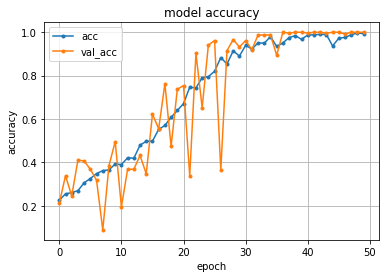

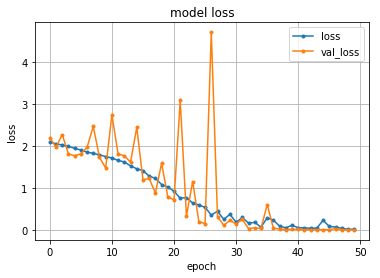

In [11]:
from matplotlib import pyplot as plt
# 精度のplot
plt.plot(history.history['acc'], marker='.', label='acc')
plt.plot(history.history['val_acc'], marker='.', label='val_acc')
plt.title('model accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

# 損失のplot
plt.plot(history.history['loss'], marker='.', label='loss')
plt.plot(history.history['val_loss'], marker='.', label='val_loss')
plt.title('model loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

In [12]:
#model.save(drive_root_dir + "alexdogs_model.h5")

from sklearn.metrics import confusion_matrix
predict_classes = model.predict_classes(x_test)
true_classes = np.argmax(y_test,1)
print(confusion_matrix(true_classes,predict_classes))

[[33  3  2 10  8  3  3  0  5 11]
 [ 7 12  5  3  2  2  6  0  4  6]
 [ 3  2 25  1  8  2  6  0  5  3]
 [ 4  8  0 10  4 10  5  1  5  6]
 [ 2  2  5  1 32  1 12  0  4  1]
 [ 6  2  0  2  6 57  4  0  9  2]
 [ 0  2  2  1 13  2 23  0  2  3]
 [ 4  3  1 15  7  5  1  6  7  3]
 [ 3  3  1  6  6  7  3  1 18  4]
 [ 3  3  0  4  3  2  8  1  3 17]]
